In [77]:
#creating the graph etc
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
import pandas as pd
from scipy import stats, integrate
#import plotly
import sklearn.cluster as cluster

%matplotlib inline


#assuming the importation of data as pandas data frames before here

#====begin making graph/network====


dfP=pd.read_csv('./data/final.csv')

dfP.rename(columns={'Category':'crimeCount'}, inplace=True)


/home/brady/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [78]:
#Making networks
from networkx.algorithms import bipartite
teamsGraph=nx.Graph()
teams=dfP.team.unique()


for i in teams:
	teamsGraph.add_node(i,team=1,bipartite=0,crimes=-1) #team name
	#something like teamsGraph.add_node("Bears", team=1), but import team name from data structure
	#see https://stackoverflow.com/questions/28533111/plotting-networkx-graph-with-node-labels-defaulting-to-node-name
	
names=dfP.name.unique()	

#namesGroup=dfP.groupby(['name','college'])['num_arrests'].count()
#dfn2=pd.DataFrame


for name in names:#number of players
    #nameTemp=dfP.loc(dfP['name'].isin([name]))
    nameTemp=dfP[(dfP.name==name)]
    #print(type(nameTemp))

    #arrestCountByYear[(arrestCountByYear.Name == "David Boston")]
    #print(nameTemp)
    
    playerCrimes=nameTemp.crimeCount.unique()
    #playerCrimes=nameTemp.count.count()
    crimee=0
    for crim in playerCrimes:
        if crim==1:
            crimee=1
    teamsGraph.add_node(name,crimes=crimee, bipartite=1)
    
    playerTeams=nameTemp.team.unique()
    for team in playerTeams:
        teamsGraph.add_edge(team,name)
	#teamsGraph.add_node(i) #player name, and crimes
	#something like teamsGraph.add_node("John Doe", crimes=[dui,dui,resist])
	
# for j in range():#number of teams played on per player
# 	teamsGraph.add_edge() #edge between player and team
		
    


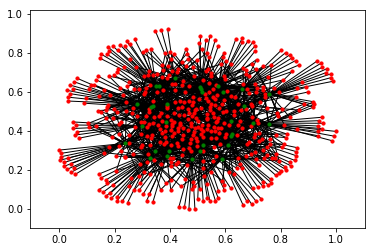

In [79]:
#Actual network analysis

#print(nx.get_node_attributes(teamsGraph,'bipartite'))
#print()
interestNodes=[n for n,m in teamsGraph.nodes(data=True) if (m['bipartite']==0 or m['crimes']==1)]
crimeNodes=[n for n,m in teamsGraph.nodes(data=True) if (m['crimes']==1)]
notCrimeNodes=[n for n,m in teamsGraph.nodes(data=True) if (m['crimes']==0)]

teamNodes=[n for n,m in teamsGraph.nodes(data=True) if (m['crimes']==-1)]
listOfEdges = [edge for edge in teamsGraph.edges()]
#print(interestNodes)
#interestNodes=[(nodes) for nodes in nx.nodes(teamsGraph) if (nodes.bipartite==0 or nodes.crimes)]
#print(type(nx.nodes(teamsGraph)))
#interestNodes=[node for node in teamsGraph.nodes if (node.bipartite==0 or node.crimes)]
#interestNodes=filter(lambda (n, d): (d['bipartite'] == 0), teamsGraph.nodes(data=True))
#print(teamsGraph.node.items)
#interestNodes=[nodes in teamsGraph.node if (nodes.bipartite==0 or nodes.crimes)]
## see https://stackoverflow.com/questions/16910538/efficient-extraction-of-a-subgraph-according-to-some-edge-attribute-in-networkx
crimeNet=teamsGraph.subgraph(interestNodes)
crimeEdges= [edge for edge in crimeNet.edges()]
#
#
##cool network analysis shit
C=nx.clustering(crimeNet)
B=nx.betweenness_centrality(crimeNet)
crAdjMat=crimeNetAdjMat = nx.adjacency_matrix(crimeNet)
#
#ax(B[ x)
import operator
maxBet=max(B.items(), key=operator.itemgetter(1))[0]
minBet=min(B.items(), key=operator.itemgetter(1))[0]


pos = nx.spring_layout(crimeNet)
nx.draw_networkx_nodes(crimeNet, pos, nodelist=crimeNodes, cmap=plt.get_cmap('jet'), node_color = 'r',node_size=10)
nx.draw_networkx_nodes(crimeNet, pos, nodelist=teamNodes, cmap=plt.get_cmap('jet'),node_color = 'g',node_size=10)

nx.draw_networkx_edges(crimeNet, pos, edgelist=crimeEdges, arrows=False)
#plt.figure(figsize=)
#plt.savefig("crimeNet.png", dpi=1000)
#plt.savefig("crimeNet.pdf")
#plt.show()



In [ ]:
pos = nx.spring_layout(teamsGraph)
nx.draw_networkx_nodes(teamsGraph, pos, nodelist=notCrimeNodes, cmap=plt.get_cmap('jet'), node_color = 'b',node_size=10)
nx.draw_networkx_nodes(teamsGraph, pos, nodelist=crimeNodes, cmap=plt.get_cmap('jet'), node_color = 'r',node_size=10)
nx.draw_networkx_nodes(teamsGraph, pos, nodelist=teamNodes, cmap=plt.get_cmap('jet'),node_color = 'g',node_size=10)
#nx.draw_networkx_labels(teamsGraph, pos)
nx.draw_networkx_edges(teamsGraph, pos, edgelist=listOfEdges, arrows=False)
#plt.figure(figsize=)
#plt.savefig("fullNet.png", dpi=1000)
#plt.savefig("fullNet.pdf")
plt.show()


In [ ]:
playerNodes = (notCrimeNodes + crimeNodes)

uniTeamsGraph = bipartite.projected_graph(teamsGraph, playerNodes)

uniEdges = uniTeamsGraph.edges()



In [ ]:
pos = nx.spring_layout(uniTeamsGraph)
nx.draw_networkx_nodes(uniTeamsGraph, pos, nodelist=notCrimeNodes, cmap=plt.get_cmap('jet'), node_color = 'b',node_size=10)
nx.draw_networkx_nodes(uniTeamsGraph, pos, nodelist=crimeNodes, cmap=plt.get_cmap('jet'), node_color = 'r',node_size=10)
nx.draw_networkx_edges(uniTeamsGraph, pos, edgelist=uniEdges, arrows=False)


In [ ]:
uniCrimesGraph = bipartite.projected_graph(crimeNet, crimeNodes)
uniCrimeEdges = uniCrimesGraph.edges()
nx.draw(uniCrimesGraph)



In [ ]:
crimeGraph=nx.Graph()
crimeList = ['Alcohol','Animal Abuse','Assault / Battery', 'DUI','Disorderly conduct','Domestic Violence','Drugs','Gun','License / Traffic','Murder / Manslaughter','Resisting','Sex','Other','Theft / Burglary']

for i in crimeList:
    crimeGraph.add_node(i,issaCrime=1)
    
dfC = dfP[(dfP.crimeCount >= 1)]

for i in dfC.name.unique():
    crimeGraph.add_node(i, issaCrime=0)


def createCrimeNodes(i, row):
    for crime in crimeList:
        if row[crime] >= 1:
            crimeGraph.add_edge(crime, row['name'])
[createCrimeNodes(i, row) for i, row in dfC.iterrows()]

# print(dict([n for n, m in crimeGraph.nodes(data=True) if (m['issaCrime']==1)]))
labels = dict((key, key) for (key, value) in crimeGraph.nodes(data=True) if (value['issaCrime']==1))

crimeNodes =[n for n,m in crimeGraph.nodes(data=True) if (m['issaCrime']==1)]
playNodes =[n for n,m in crimeGraph.nodes(data=True) if (m['issaCrime']==0)]
listOfCrimeEdges= [edge for edge in crimeGraph.edges()]


In [ ]:
#printing graph that links players crimes to the crimes

pos = nx.spring_layout(crimeGraph)
nx.draw_networkx_nodes(crimeGraph, pos, nodelist=crimeNodes, cmap=plt.get_cmap('jet'), node_color = 'r',node_size=20)
nx.draw_networkx_nodes(crimeGraph, pos, nodelist=playNodes, cmap=plt.get_cmap('jet'),node_color = 'g',node_size=10)
nx.draw_networkx_edges(crimeGraph, pos, edgelist=listOfCrimeEdges, arrows=False)
nx.draw_networkx_labels(crimeGraph, pos, labels=labels)



In [ ]:
###Degree centrality graph within crime network
D = crimeNet.degree()
degrees = sorted(set(D.values()))
print(degrees)
degree_agg = [list(D.values()).count(x) for x in degrees]

plt.figure(figsize=(10,8))
plt.plot(degrees, degree_agg)

plt.legend('')
plt.ylabel('Number of nodes (Player/Team)')
plt.xlabel('Degree')
plt.ylim(1,200)

plt.title("Degree metrics for Crime Network")
plt.savefig("DegreeMet.png")



##Betweenness by teams
teamNodes = set(n for n,d in crimeNet.nodes(data=True) if d['bipartite']==0)

TB = bipartite.betweenness_centrality(crimeNet, teamNodes)

teamCentrality = {}
for key in list((TB))[:32]:

    teamCentrality[key] = TB[key]

plt.figure(figsize=(10,8))
plt.bar(range(len(teamCentrality)), teamCentrality.values())
plt.xticks(range(len(teamCentrality)), teamCentrality.keys(), rotation=90)
plt.title("Betweenness Centrality for NFL teams in the Crime Network")
plt.ylabel('Betweenness')
plt.xlabel("Team")
plt.savefig("BetweenMet.png")
plt.show()
